<a href="https://colab.research.google.com/github/CamilaLoranne/IA-Reinternacao-Hospitalar/blob/main/Previs%C3%A3o_de_Risco_de_Reinterna%C3%A7%C3%A3o_Hospitalar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de IA Supervisionada: Predição de Reinternação Hospitalar


# Objetivo do Projeto


Este projeto utiliza algoritmos de aprendizado supervisionado para prever se um paciente será reinternado em até 30 dias após a alta hospitalar. O objetivo é fornecer uma ferramenta de apoio à decisão clínica, contribuindo para reduzir taxas de reinternação e melhorar o cuidado contínuo.


In [61]:
import pandas as pd

#Carregando os dados
dados = pd.read_csv("pacientes_hospital_1000.csv", encoding='latin1', sep=';')
dados.head()

,id_paciente,idade,sexo,comorbidades,tempo_internacao(em dias),mobilidade,fisioterapia_realizada,numero_medicamentos,alta_para_casa,reinternado_30dias
0,1,88,M,"Alzheimer, insuficiência cardíaca, doença renal",10,deambulando,sim,6,não,0
1,2,78,F,DPOC,9,deambulando,sim,14,não,0
2,3,64,F,Alzheimer,5,deambulando,não,11,sim,0
3,4,92,F,"doença renal, câncer, insuficiência cardíaca",4,cadeira de rodas,sim,10,sim,0
4,5,57,F,"câncer, DPOC",9,deambulando,sim,13,sim,0


In [62]:
#Codificação de variáveis categóricas - transformando variáveis de texto para número
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dados['sexo'] = le.fit_transform(dados['sexo'])
dados['mobilidade'] = le.fit_transform(dados['mobilidade'])
dados['fisioterapia_realizada'] = le.fit_transform(dados['fisioterapia_realizada'])
dados['alta_para_casa'] = le.fit_transform(dados['alta_para_casa'])


In [63]:
#Selecionando os dados para o modelo
#Retirando as colunas id_paciente e comorbidades
dados_model = dados.drop(columns=['id_paciente', 'comorbidades'])

#variáveis de entrada
x = dados_model.drop('reinternado_30dias', axis=1)
#variável-alvo
y = dados_model['reinternado_30dias']

# Divisão entre treino e teste

In [64]:
from sklearn.model_selection import train_test_split


treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size=0.2,
                                                        stratify=y,
                                                        random_state=42)

print(f"Treinaremos com {len(treino_x)} elementos")
print(f"Testaremos com {len(teste_x)} elementos")

Treinaremos com 800 elementos
Testaremos com 200 elementos


# Ajuste de pesos de classe

In [65]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

classes = np.array([0, 1])  # Converte a lista para numpy array
class_weights = compute_class_weight('balanced', classes=classes, y=treino_y)
class_weights_dict = {classes[0]: class_weights[0], classes[1]: class_weights[1]}


# Treinano o modelo de IA supervisionado

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights_dict)
modelo.fit(treino_x, treino_y)
y_pred = modelo.predict(teste_x)

# Avaliando os resultados

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Matriz de Confusão:\n", confusion_matrix(teste_y, y_pred))
print("\nRelatório de Classificação:\n", classification_report(teste_y, y_pred))


# Acurácia
print(f"Acurácia: {accuracy_score(teste_y, y_pred)}")


Matriz de Confusão:
 [[152   9]
 [ 20  19]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       161
           1       0.68      0.49      0.57        39

    accuracy                           0.85       200
   macro avg       0.78      0.72      0.74       200
weighted avg       0.84      0.85      0.85       200

Acurácia: 0.855


# Visualizações Exploratórias

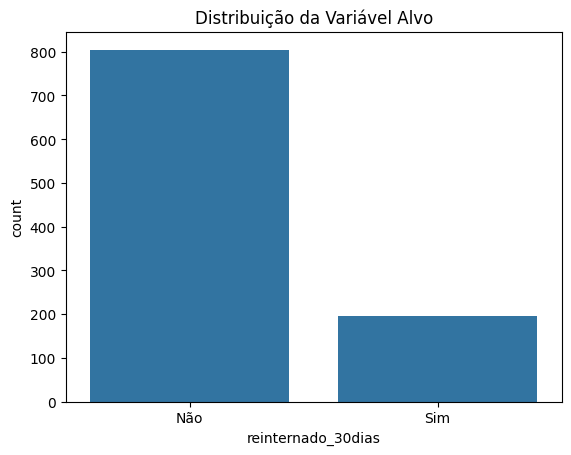

In [71]:
# Distribuição da variável alvo
sns.countplot(x='reinternado_30dias', data=dados)
plt.title('Distribuição da Variável Alvo')
plt.xticks([0,1], ['Não', 'Sim'])
plt.show()

Por que é importante: Ajuda a identificar se os dados estão desbalanceados. Nesse caso, há mais pacientes não reinternados, o que justifica o uso da técnica como class_weight para equilibrar o modelo.

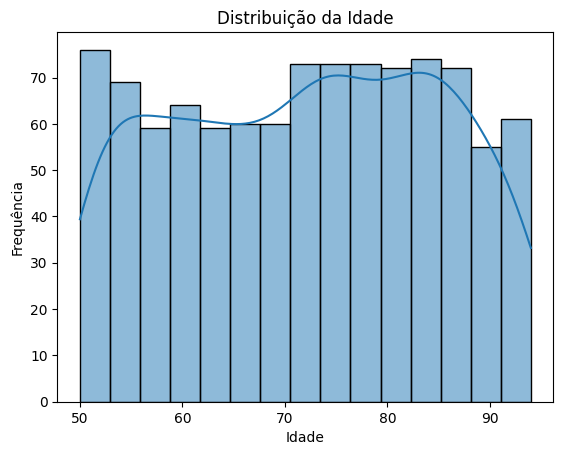

In [72]:
# Distribuição da idade
sns.histplot(dados['idade'], bins=15, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

O que o gráfico mostra?
A maioria dos pacientes está na faixa dos 50 aos 90 anos, mais precisamente para os grupos entre 50–55 e 75–85 anos, onde possui maior frequência.

Por que é relevante?
Como a idade avançada é um fator de risco para reinternações hospitalares, essa distribuição indica que o modelo está sendo treinado com uma população-alvo realista e com risco clínico mais elevado — algo esperado em ambientes hospitalares.

Insight:
O hospital atende majoritariamente pacientes idosos, o que pode justificar estratégias de alta mais robustas para prevenir reinternações nesse grupo.

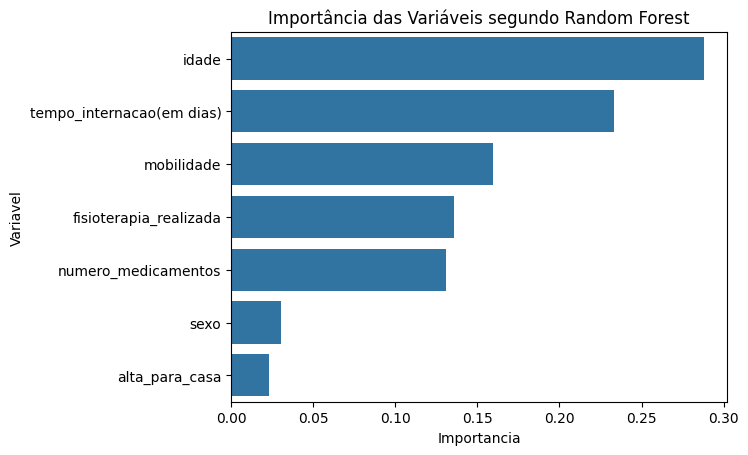

In [73]:
# Importância das Variáveis
importancias = modelo.feature_importances_
colunas = x.columns
df_importancia = pd.DataFrame({'Variavel': colunas, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)
sns.barplot(x='Importancia', y='Variavel', data=df_importancia)
plt.title('Importância das Variáveis segundo Random Forest')
plt.show()

O que o gráfico mostra?
Ele exibe o quanto cada variável contribui para a decisão do modelo Random Forest ao prever a reinternação em até 30 dias.

Principais variáveis:

*Idade foi a variável mais influente — pacientes mais velhos parecem ter maior risco de reinternação.

*Tempo de internação também teve alto impacto — internações mais longas podem indicar maior complexidade clínica.

*Mobilidade, número de medicamentos e fisioterapia realizada também influenciaram significativamente, sugerindo que aspectos funcionais e terapêuticos são relevantes.

Por que é relevante?
Essa análise ajuda a explicar por que o modelo faz certas previsões — uma demanda essencial na área da saúde.

Conclusão e Implicações Clínicas

O modelo de Random Forest obteve uma acurácia de cerca de 85% e identificou 49% dos pacientes que foram reinternados.
Apesar da boa acurácia geral, o recall da classe minoritária ainda pode ser melhorado.

Mesmo assim, o modelo pode servir como um sistema de apoio na triagem hospitalar, indicando pacientes com maior risco de reinternação. Isso pode ajudar na definição de planos de cuidado mais intensivos no momento da alta.

Como próximos passos, recomenda-se testar:
- Uso de técnicas de oversampling como SMOTE
- Ajuste do limiar de decisão do modelo
- Teste de outros algoritmos como XGBoost ou LightGBM